# WeatherPy (Python API Homework)

### Analysis
* Latitude
    * There is more land, people, and cities in the northern hemisphere.
    * Hence the density of the data will naturally skew toward the positive latitudes with a purely random sample.
    * Future research could use a stratified sampling method if actual latitude is the measure of the independent variable.
* Latitude vs. Temperature
    * Results showed a significant (p<0.05) but weak negative (r=-0.11) correlation between latitude and temperature. 
    * This data does not allow us to assume a significant difference in temperature based on latitude.
    * However there is a visable increase near the equator on the plot. 
    * This outcome is likely because the sample includes actual latitudes of cities in both the northern and southern hemispheres. 
    * Future analysis could include a selective sampling process to test one hemisphere at a time or take the absolute value. (see appendix)
* Latitude vs. Humidity
    * As with temperature, there is a significant (p<0.05) but weak negative (r=-0.16) correlation between latitude and humidity.
    * The distribution of data suggests that latitude and humidity are unrelated.
    * Despite the significant p-value the correlation is spurious and weak.
* Latitude vs. Cloudiness
    * There is absolutely no significant (p=0.35,r=.031) relationship between latitude and cloudiness.
* Latitude vs. Wind Speed
    * There is a significant (p<0.05) but weak (r=0.13) correlation between latitude and wind speed.
    * The visual distribution of data and weak correlation suggest that latitude and wind speed are unrelated.

### Importing Depenedncies and Reading List of Cities
* List of cities from 'www.maxmind.com/en/free-world-cities-database'
* Citipy utilizes the same data see 'https://github.com/wingchen/citipy'

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

* Be sure to add a new API key to 'config.py'. I am deauthorizing this key before posting to github for obvious reasons

In [2]:
#API Key
from config import api_key
#print(api_key)

* Read csv, select cities with pop >= 50,000, and select unique latitudes
* This is to ensure better geographic distribution and clean up data

In [3]:
cities = pd.read_csv('city_list.csv', header=0)
cities = cities[np.isfinite(cities['Population'])]
cities = cities[cities['Population'].values >=50000]
cities.drop_duplicates(subset='Latitude', keep='first', inplace=False)
cities.reset_index(drop=True)
cities.count()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Country       7279
City          7279
AccentCity    7279
Region        7279
Population    7279
Latitude      7279
Longitude     7279
dtype: int64

### Sample Selection and API Calls

* Select random sample and remove unused variables 

In [4]:
sample_cities = cities.sample(n=1000)
sample_cities.drop('AccentCity', axis=1, inplace=True)
sample_cities.drop('Region', axis=1, inplace=True)
sample_cities.drop('Population', axis=1, inplace=True)
sample_cities.reset_index(drop=True)

,Country,City,Latitude,Longitude
0,ru,kaspiysk,42.881648,47.639194
1,zw,marondera,-18.183333,31.550000
2,jp,tachikawa,35.692778,139.418056
3,es,malaga,36.726666,-4.434802
4,us,lafayette,30.223889,-92.019722
5,br,penapolis,-21.400000,-50.066667
6,ke,nyeri,-0.416667,36.950000
7,es,valencia,39.466667,-0.366667
8,us,milwaukee,43.038889,-87.906389
9,md,chisinau,47.005556,28.857500


* Loop through sample cities for weather conditions and write to dataframe

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
for index, row in sample_cities.iterrows():

    country = row['Country']
    city = row['City']
    query_url = f"{url}units={units}&APPID={api_key}&q={city},{country}"
    response = requests.get(query_url)
    results = response.json()
    pprint(query_url)
    try:
        sample_cities.loc[index,'Temperature (f)'] = results["main"]["temp_max"]
        sample_cities.loc[index,'Humidity (%)'] = results["main"]["humidity"]
        sample_cities.loc[index,'Cloudiness (%)'] = results["clouds"]["all"]
        sample_cities.loc[index,'Wind Speed (mph)'] = results["wind"]["speed"]
    except KeyError:
        pass

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=kaspiysk,ru'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=marondera,zw'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=tachikawa,jp'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=malaga,es'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=lafayette,us'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=penapolis,br'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=nyeri,ke'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2178366abd64d9f8cc96b64ab0063b85&q=valencia,es'
'http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

* Drop all cities not found in API calls, get count of final sample size, and write to csv

In [11]:
sample_cities = sample_cities[np.isfinite(sample_cities['Temperature (f)'])]
sample_cities.to_csv("sample_city_output", sep=',', encoding='utf-8')
sample_cities.count()

Country             939
City                939
Latitude            939
Longitude           939
Temperature (f)     939
Humidity (%)        939
Cloudiness (%)      939
Wind Speed (mph)    939
dtype: int64

### Scatterplots with Correlation Tests

* City Latitude and Temperature

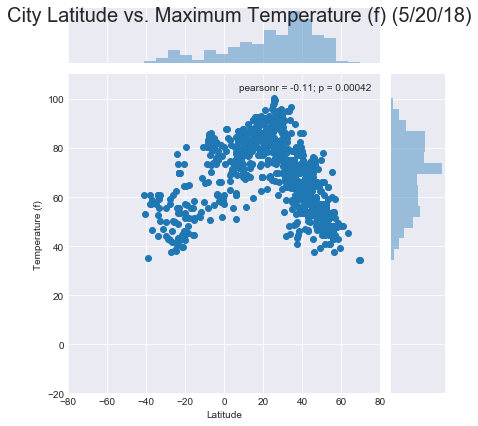

In [16]:
sns.set_style("darkgrid")
temp = sns.jointplot(x="Latitude", y="Temperature (f)", data=sample_cities, kind="scatter", ylim=(-20,110), xlim=(-80,80))
temp.fig.suptitle('City Latitude vs. Maximum Temperature (f) (5/20/18)',fontsize=20)
temp.savefig("temp.png")

* City Latitude and Humidity

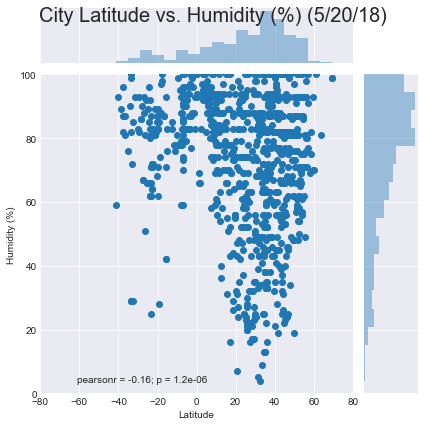

In [15]:
sns.set_style("darkgrid")
hum = sns.jointplot(x="Latitude", y="Humidity (%)", data=sample_cities, kind="scatter", ylim=(0,100), xlim=(-80,80))
hum.fig.suptitle('City Latitude vs. Humidity (%) (5/20/18)',fontsize=20)
hum.savefig("hum.png")

* City Latitude and Cloudiness

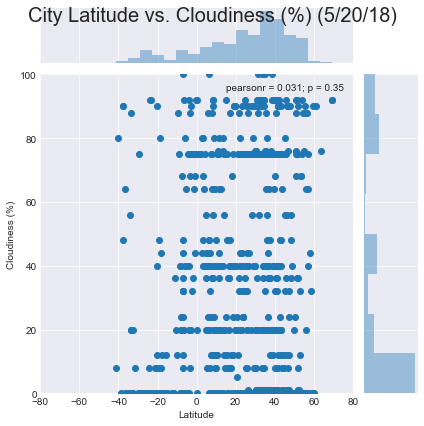

In [14]:
sns.set_style("darkgrid")
cloud = sns.jointplot(x="Latitude", y="Cloudiness (%)", data=sample_cities, kind="scatter", ylim=(0,100), xlim=(-80,80))
cloud.fig.suptitle('City Latitude vs. Cloudiness (%) (5/20/18)',fontsize=20)
cloud.savefig("cloud.png")

* City Latitude and Wind Speed

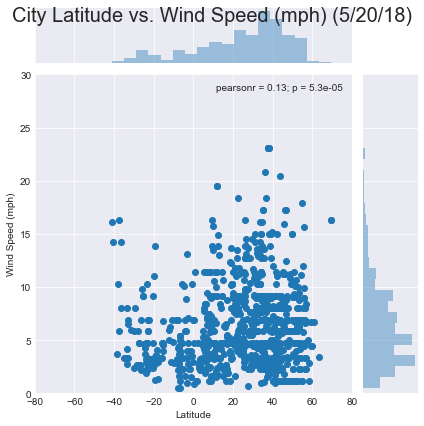

In [13]:
sns.set_style("darkgrid")
wind = sns.jointplot(x="Latitude", y="Wind Speed (mph)", data=sample_cities, kind="scatter", ylim=(0,30), xlim=(-80,80))
wind.fig.suptitle('City Latitude vs. Wind Speed (mph) (5/20/18)',fontsize=20)
wind.savefig("wind.png")

### Appendix

* Take absolute values of latitudes to remove negative numbers and align the data

In [22]:
sample_cities['abs lat'] = sample_cities['Latitude'].abs()

In [24]:
sample_cities.head()

,Country,City,Latitude,Longitude,Temperature (f),Humidity (%),Cloudiness (%),Wind Speed (mph),abs lat
2415329,ru,kaspiysk,42.881648,47.639194,62.60,88.0,48.0,6.71,42.881648
3173312,zw,marondera,-18.183333,31.550000,48.34,97.0,44.0,4.07,18.183333
1543356,jp,tachikawa,35.692778,139.418056,73.40,33.0,75.0,2.24,35.692778
873410,es,malaga,36.726666,-4.434802,57.20,82.0,0.0,4.70,36.726666
2954148,us,lafayette,30.223889,-92.019722,82.40,83.0,1.0,3.36,30.223889


Text(0.5,0.98,'Degrees Latitude From Equator vs. Maximum Temperature (f) (5/20/18)')

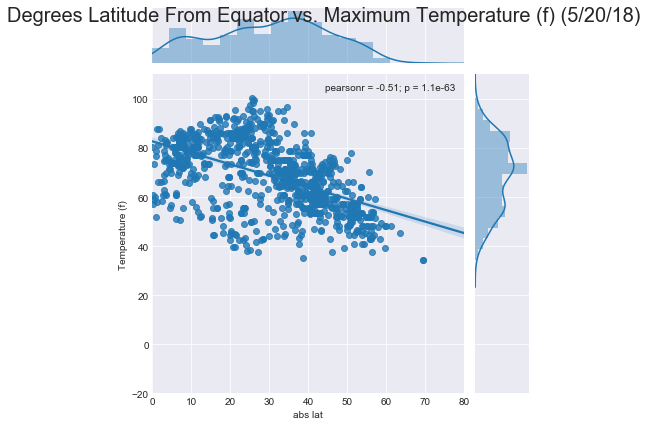

In [28]:
sns.set_style("darkgrid")
temp = sns.jointplot(x="abs lat", y="Temperature (f)", data=sample_cities, kind="reg", ylim=(-20,110), xlim=(0,80))
temp.fig.suptitle('Degrees Latitude From Equator vs. Maximum Temperature (f) (5/20/18)',fontsize=20)

* If we accept that the independent variable is distance from the equator and the hemisphere is not relevant, 
    then the absolute value of a given latitude should be used rather than actual latitude.
* In this case there is a significant moderate negative correlation between temperature and distance from the equator.